<a href="https://colab.research.google.com/github/sheki018/mini-project/blob/main/MiniProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INSTALL AND IMPORT MODULES**

In [1]:
!pip uninstall crypto
!pip uninstall pycryptodome
!pip install pycryptodome


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.1 MB/s 


In [2]:
!pip install cryptography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 5.6 MB/s 


In [3]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes

In [4]:
!pip install stepic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 219 kB 5.1 MB/s 
  Created wheel for stepic: filename=stepic-0.5.0-py3-none-any.whl size=12428 sha256=71bd045493df517a28956455c00cb9ba0771e63cd48d335934604a75388ecaa8
  Stored in directory: /root/.cache/pip/wheels/47/8d/57/322e721ace59cf72d328242bbc636e6affc672344cf5480f33
Successfully built stepic


## **KEY GENERATION**

In [5]:
def gen_key():
    private_key = rsa.generate_private_key(
        public_exponent=65537, key_size=2048, backend=default_backend())
    
    public_key = private_key.public_key()
    return private_key, public_key


def save_pvkey(pk, filename):
    pem = pk.private_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PrivateFormat.TraditionalOpenSSL,
        encryption_algorithm=serialization.NoEncryption()
    )
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem)
        
def save_pukey(pk, filename):        
    pem = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
    )
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem)

private_key, public_key = gen_key()

save_pvkey(private_key, 'private_key')
save_pukey(public_key, 'public_key')
print("private key and public key generated.")

private key and public key generated.


## **SENDER END**

In [6]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

# **DNA CRYPTO**

In [24]:
DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
                   "X","Y","Z"," ",",",".",":","0","1","2","3","4","5","6","7","8","9"],
            "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
                         "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
                         "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
           }

DNA_df = pd.DataFrame.from_dict(DNA_data)
#print(DNA_df)

message = input("Please enter your message: ")
#Name : George Mendes, Gender : Male, Birthdate : 5.9.1995, SSN : 15657834939, Medical History : Diabetes, Diagnosis : broken arm
DNA_crypto_message = ""
word = message.upper()


for i in word:
    DNA_crypto_message+= str(DNA_df.loc[ DNA_df['words'] == i , 'DNA_code' ].iloc[0])
    
print(DNA_crypto_message)

Please enter your message: Name : George Mendes, Gender : Male, Birthdate : 5.9.1995, SSN : 15657834939, Medical History : Diabetes, Diagnosis : broken arm
TCTCGATCCGGCACCGCTACCTTTGGCGGATCATTTGGCACCTCCGGCTCTTTGGGCACGTCGACCTTTGGCTCTTTGGGCTCAACCGCTACCTCCCGATGCGGCTCGACCCCAATGTCATTCCGCTTGCGATTCGGCACCGCTACCAGAGATGCGGATTAGGCGGCGAGATCGACCACGACGTCTACCGCTACCTAGAGATTAAGAACAAGGGCAGAGGCGGCAGCGTCGACCTCCGGCTTGATGGTTCGATGCACCCGCATGACGTTCGGATCAAAAACCGCTACCTTGATGCGACCAGGCTTCGGCACGTCGACCTTGATGCGATTTTCTGGAACGATGACGACCGCTACCCCATCAGGAAAGGGCTCTACCCGATCATCC


# **AES CRYPTO**

In [30]:
#block size =16
#AES-128
BS = 16
#data should be a multiple of 16 bytes n length. Pad the buffer if it is not and include the size of the data at the beginning of the output.
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s : s[0:-ord(s[-1:])]

class AESCipher:

    def __init__( self, key ):
        #generate key
        self.key = bytes(key, 'utf-8')

    def encrypt( self, raw ):
        raw = pad(raw)
        #initialization vector - 16 bytes
        iv = Random.new().read( AES.block_size )
        #MODE_CBC - cipher-block chaining - each plaintext block gets XOR-ed with the previous ciphertext prior to encryption
        cipher = AES.new(self.key, AES.MODE_CBC, iv )
        return base64.b64encode( iv + cipher.encrypt( raw ) )

cipher = AESCipher('LKHlhb899Y09olUi')
AES_encrypted_message = cipher.encrypt(DNA_crypto_message)

print(AES_encrypted_message)

b'DB0/gAlilqNt22n0w2m2Ni32U2fBYlVO+Vb0D8Z+nOxmv+DgPOFULpB6sopyE27jgY3+n3m5pK3iOfKZSSTMc8KjGbxaayDNi1Zw0tDv3UkEKboUOANoHKGoUFIK/0c1GZCqTkDBZsLHGgQV5iDWXChdUvg5HpvdqPH1Pyjiz6vunkoYYSrgD1aVH0phnbGuUw38W3OZEfvOBbPxlff+T4cL/MPWeCdPr7G1X6HJ6/Gut5JYaKlUA4E4lUSpzVQl4QTuDmi7RbWc3/e5KvAT3cDtHh3S7BZ2wtK5ysRx530WCR1+U/jFG5WqC5Gza9NB1pKfTGtG5m8w5OcHgrP6amnaKY6yhkOligr/oHKR/EqnJ0SekHqxvo5Fkq7gmqzM6eImrw6kVoVPTi1iEjepClEGqKfIPdINwHPYQysty3jq/y3ytpNylXfcJDJ+g04u8atlFv88iG46R5aWdu1wR0ECmfc+UXb/jAQTyKgdEhdSdPGFcGyY0SVmuJmmFL/Uzpve7tPF8ZwclAaKDQe/xZQtl3ngfp99NiG/vwT4Xdg='


# **DIGITAL SIGNATURE**

In [31]:
def load_pvkey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
        
    private_key = load_pem_private_key(pemlines, None, default_backend())
    return private_key

message = AES_encrypted_message
private_key = load_pvkey("private_key")
signature = private_key.sign(message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
# signature

# **SECRET MESSAGE GENERATION**

In [50]:
im = Image.open('original_image.jpg')
#Encode some text into your Image file and save it in another file
secret_msg = AES_encrypted_message + bytes("SIGNATURE", 'utf-8') + signature


# **LSB STEGANOGRAPHY**

In [51]:
im1 = stepic.encode(im, secret_msg)
im1.save('encoded_image.png', 'PNG')

In [52]:
import cv2
import numpy as np
from math import log10,sqrt
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original=cv2.imread("original_image.jpg")
steg=cv2.imread("encoded_image.png")  
value = PSNR(original,steg)

print(f"PSNR value:  {value} dB")

PSNR value:  64.29987343249178 dB


# **IMAGE COMPRESSION**

Image compressed at 5.00%
Image compressed at 46.00%
Image compressed at 58.00%
Image compressed at 62.00%
Image compressed at 65.00%
Image compressed at 67.00%
Image compressed at 68.00%
Image compressed at 69.00%
Image compressed at 69.00%
Image compressed at 69.00%


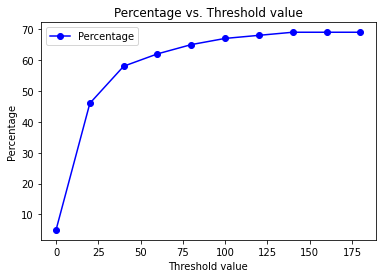

The average time is 0.0


In [56]:
import sys, os, time, numpy, pywt
import matplotlib.pyplot as plt
from PIL import Image

def wavelet_transform(data, threshold):
    wavelet_type = 'haar'
    clean_coef = list()
    compose = list()

    cA2, cD2, cD1 = pywt.wavedec2(data, wavelet_type, level=2)
    clean_coef.append(cA2)
    clean_coef.append(cD2)

    for c in cD1:
        compose.append(numpy.where(((c<(-threshold)) | (c>threshold)), c, 0))
    clean_coef.append(tuple(compose))

    t = pywt.waverec2(clean_coef, wavelet_type)
    values = t.astype(int)
    return values

def create_image(image, values, threshold):
    matrix = list()
    for value in values:
        row = list()
        for v in value:
            row.append((int(v), int(v), int(v)))
        matrix.append(row)

    width, height = image.size
    new_image = Image.new('RGB', (width, height))
    new = new_image.load()
    for w in range(width):
        for h in range(height):
            new[w, h] = matrix[h][w]

    image_name = str(threshold) + '.png'
    new_image.save(image_name)
    return new_image

def grayscale(image):
    width, height = image.size
    pixels = image.load()

    for w in range(width):
        for h in range(height):
            r, g, b = pixels[w, h]
            gray = (r+g+b)//3
            pixels[w, h] = (gray, gray, gray)
    return image

def get_rows_values(image):
    width, height = image.size
    pixels = image.load()
    matrix = list()

    for j in range(height):
        row = list()
        for i in range(width):
            pixel_value = pixels[i, j][0]
            row.append(pixel_value)
        matrix.append(row)

    array = numpy.array(matrix)
    return array

def compress(image_path, threshold):
    image = Image.open(image_path).convert('RGB')
    image = grayscale(image)

    data = get_rows_values(image)
    values = wavelet_transform(data, threshold)

    newimage = create_image(image, values, threshold)
    return compressed_percentage(image_path, threshold)

def compressed_percentage(image_path, threshold):
    original_size = os.path.getsize(image_path)
    image_name = str(threshold) + '.png'
    final_size = os.path.getsize(image_name)
    percentage = 100 - (final_size*100)//float(original_size)
    print ('Image compressed at %0.2f%%' % percentage)
    return percentage

def main():
    image_path = "encoded_image.png"

    time_list = list()
    percentages_list = list()
    thresholds_list = list()
    for threshold in range(0, 200, 20):
        start_time = time.time()
        compressed_percentage = compress(image_path, threshold)
        end_time = time.time()
        process_time = end_time - start_time
        time_list.append(process_time)
        percentages_list.append(compressed_percentage)
        thresholds_list.append(threshold)

    p = plt.plot(thresholds_list, percentages_list, 'bo-', label='Percentage')
    plt.legend(loc='upper left', numpoints=1)
    plt.ylabel('Percentage')
    plt.xlabel('Threshold value')
    plt.title('Percentage vs. Threshold value')
    plt.show()

    average_time = sum(time_list)//len(time_list)
    print ('The average time is', average_time)

if __name__ == '__main__':
    main()

In [71]:
import cv2
import numpy as np
from math import log10,sqrt
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original=cv2.imread("original_image.jpg")
steg=cv2.imread("180.png")  
value = PSNR(original,steg)

print(f"PSNR value:  {value} dB")

PSNR value:  33.02209674695082 dB


## **TARGET END**

In [57]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

# **SIGNATURE AND MESSAGE DECODING**

In [60]:
im = Image.open('encoded_image.png')
stegoImage = stepic.decode(im)

ind_sep = stegoImage.find('SIGNATURE')
message = bytes(stegoImage[:ind_sep],'utf-8')
signature = bytes(stegoImage[ind_sep+9:], 'latin1')

# **VERIFY DIGITAL SIGNATURE**

In [61]:
def load_pukey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
    public_key = load_pem_public_key(pemlines, default_backend())
    return public_key

public_key = load_pukey("public_key")
try:
    public_key.verify(signature, message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), 
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
    print(message)
except InvalidSignature:
    print('Invalid!')

b'DB0/gAlilqNt22n0w2m2Ni32U2fBYlVO+Vb0D8Z+nOxmv+DgPOFULpB6sopyE27jgY3+n3m5pK3iOfKZSSTMc8KjGbxaayDNi1Zw0tDv3UkEKboUOANoHKGoUFIK/0c1GZCqTkDBZsLHGgQV5iDWXChdUvg5HpvdqPH1Pyjiz6vunkoYYSrgD1aVH0phnbGuUw38W3OZEfvOBbPxlff+T4cL/MPWeCdPr7G1X6HJ6/Gut5JYaKlUA4E4lUSpzVQl4QTuDmi7RbWc3/e5KvAT3cDtHh3S7BZ2wtK5ysRx530WCR1+U/jFG5WqC5Gza9NB1pKfTGtG5m8w5OcHgrP6amnaKY6yhkOligr/oHKR/EqnJ0SekHqxvo5Fkq7gmqzM6eImrw6kVoVPTi1iEjepClEGqKfIPdINwHPYQysty3jq/y3ytpNylXfcJDJ+g04u8atlFv88iG46R5aWdu1wR0ECmfc+UXb/jAQTyKgdEhdSdPGFcGyY0SVmuJmmFL/Uzpve7tPF8ZwclAaKDQe/xZQtl3ngfp99NiG/vwT4Xdg='


# **AES DECODING**

In [62]:
BS = 16
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s : s[0:-ord(s[-1:])]

class AESCipher:

    def __init__( self, key ):
        self.key = bytes(key, 'utf-8')

    def decrypt( self, enc ):
        enc = base64.b64decode(enc)
        iv = enc[:16]
        cipher = AES.new(self.key, AES.MODE_CBC, iv )
        return unpad(cipher.decrypt( enc[16:] )).decode('utf8')

cipher = AESCipher('LKHlhb899Y09olUi')
AES_decrypted = cipher.decrypt(message)

print(AES_decrypted)

TCTCGATCCGGCACCGCTACCTTTGGCGGATCATTTGGCACCTCCGGCTCTTTGGGCACGTCGACCTTTGGCTCTTTGGGCTCAACCGCTACCTCCCGATGCGGCTCGACCCCAATGTCATTCCGCTTGCGATTCGGCACCGCTACCAGAGATGCGGATTAGGCGGCGAGATCGACCACGACGTCTACCGCTACCTAGAGATTAAGAACAAGGGCAGAGGCGGCAGCGTCGACCTCCGGCTTGATGGTTCGATGCACCCGCATGACGTTCGGATCAAAAACCGCTACCTTGATGCGACCAGGCTTCGGCACGTCGACCTTGATGCGATTTTCTGGAACGATGACGACCGCTACCCCATCAGGAAAGGGCTCTACCCGATCATCC


# **DNA DECODING**

In [64]:
DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
                   "X","Y","Z"," ",",",".",":","0","1","2","3","4","5","6","7","8","9"],
            "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
                         "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
                         "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
           }

DNA_df = pd.DataFrame.from_dict(DNA_data)

l = [AES_decrypted[i:i+3] for i in range(0, len(AES_decrypted), 3)]

original_message = ""
for i in l:
    original_message+= str(DNA_df.loc[ DNA_df['DNA_code'] == i , 'words' ].iloc[0])
print("The secret message is: ",original_message.lower())

The secret message is:  name : george mendes, gender : male, birthdate : 5.9.1995, ssn : 15657834939, medical history : diabetes, diagnosis : broken arm
